In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv("staking.csv")
df["UnixTimestamp"] = pd.to_datetime(df["UnixTimestamp"], unit = 's').dt.date
df["Quantity"] = df["Quantity"].replace(',','', regex=True)
df["Quantity"] = pd.to_numeric(df["Quantity"])
df

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,Quantity,Method
0,0xaff66d29e58de0e7a283827e040d3fc3acb3384a7905...,14207347,2022-02-15,2022-02-15 00:01:22,0xc391b88b0304fbf91e134c6c7fb1edec98de2ae3,0xc0840ec5527d3e70d66ae6575642916f3fd18adf,41.324708,Stake
1,0xaff66d29e58de0e7a283827e040d3fc3acb3384a7905...,14207347,2022-02-15,2022-02-15 00:01:22,0xc0840ec5527d3e70d66ae6575642916f3fd18adf,0xbde4dfb0dbb0dd8833efb6c5bd0ce048c852c487,41.324708,Stake
2,0xeebfb52d0f7d3a60472d4cfbb502592551b78ceb78d8...,14207347,2022-02-15,2022-02-15 00:01:22,0x0485bffb86ed50c793c24953337b12557160622c,0x7bebdc537d3bb1e5ba25de8372d653c1bc5dbb19,15.489906,Transfer
3,0xd20ba67fbb5afe9953c9e025d758cd0061f109029a23...,14207380,2022-02-15,2022-02-15 00:09:14,0xdf9ab3c649005ebfdf682d2302ca1f673e0d37a2,0xde9f949a6b34dd266b07031ceccf4cd54f7fa139,1.000000,Multicall
4,0xd24c5b580aeed74782b30972a7e371acd31a534241c8...,14207391,2022-02-15,2022-02-15 00:10:32,0xdf9ab3c649005ebfdf682d2302ca1f673e0d37a2,0xc36442b4a4522e871399cd717abdd847ab11fe88,2.121584,Multicall
...,...,...,...,...,...,...,...,...
4995,0xd89562b3bdc19a1300e5644d4ac02fbc6f41c7333e36...,14237424,2022-02-19,2022-02-19 16:06:29,0x74de5d4fcbf63e00296fd95d33236b9794016631,0xe9ab8038ee6dd4fcc7612997fe28d4e22019c4b4,65.943113,Swap
4996,0x0c8393283ccdc6568040da7e277e352ed85168d4ca38...,14237425,2022-02-19,2022-02-19 16:06:32,0xe9ab8038ee6dd4fcc7612997fe28d4e22019c4b4,0xec001d0000004536cad29291f4000000d029abb2,37.624696,-
4997,0x0c8393283ccdc6568040da7e277e352ed85168d4ca38...,14237425,2022-02-19,2022-02-19 16:06:32,0xec001d0000004536cad29291f4000000d029abb2,0xf43b15ab692fde1f9c24a9fce700adcc809d5391,37.624696,-
4998,0x8f65ffbd8992f2bd85f8a2c3b088a3039b132be54828...,14237449,2022-02-19,2022-02-19 16:11:33,0xbde4dfb0dbb0dd8833efb6c5bd0ce048c852c487,0xea1c88646b21eea5254c9182a9134f227a4fea36,44.581927,Unstake


In [49]:
staking = "0xbde4dfb0dbb0dd8833efb6c5bd0ce048c852c487"

In [65]:
#users staking
stake = df.loc[df["To"] == staking]
stake_by_date = stake.groupby("UnixTimestamp")["Quantity"].sum().rename("Stake")
stake_by_date

UnixTimestamp
2022-02-15    12216.806496
2022-02-16    10597.620703
2022-02-17    11167.800071
2022-02-18    14232.149774
2022-02-19     7500.495649
Name: Stake, dtype: float64

In [58]:
#users unstaking
unstake = df.loc[df["From"] == staking]
unstake_by_date = unstake.groupby("UnixTimestamp")["Quantity"].sum().rename("Unstake")
unstake_by_date

UnixTimestamp
2022-02-15    4837.666323
2022-02-16    5133.285876
2022-02-17    6085.019245
2022-02-18    7676.013655
2022-02-19    4029.449487
Name: Unstake, dtype: float64

In [78]:
date = stake_by_date.index.tolist()
stake_list = stake_by_date.tolist()
unstake_list = unstake_by_date.tolist()

plot = pd.DataFrame()
plot["stake"] = stake_list
plot["unstake"] = unstake_list
plot.index = date
plot

,stake,unstake
2022-02-15,12216.806496,4837.666323
2022-02-16,10597.620703,5133.285876
2022-02-17,11167.800071,6085.019245
2022-02-18,14232.149774,7676.013655
2022-02-19,7500.495649,4029.449487


C:\Users\Stanley\AppData\Local\Temp/ipykernel_7084/1940351704.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date)


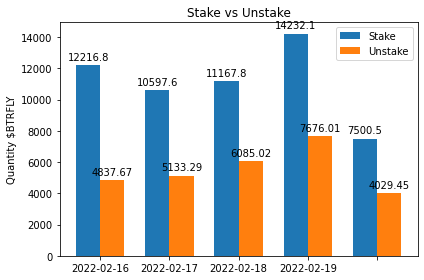

In [90]:
fig, ax = plt.subplots()
x = np.arange(len(date))
width = 0.35

rects1 = ax.bar(x - width/2, stake_list, width, label='Stake')
rects2 = ax.bar(x + width/2, unstake_list, width, label='Unstake')

ax.set_ylabel('Quantity $BTRFLY')
ax.set_title('Stake vs Unstake')
ax.set_xticklabels(date)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()